# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the dataset

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [6]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [7]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [8]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

# Visualize the data

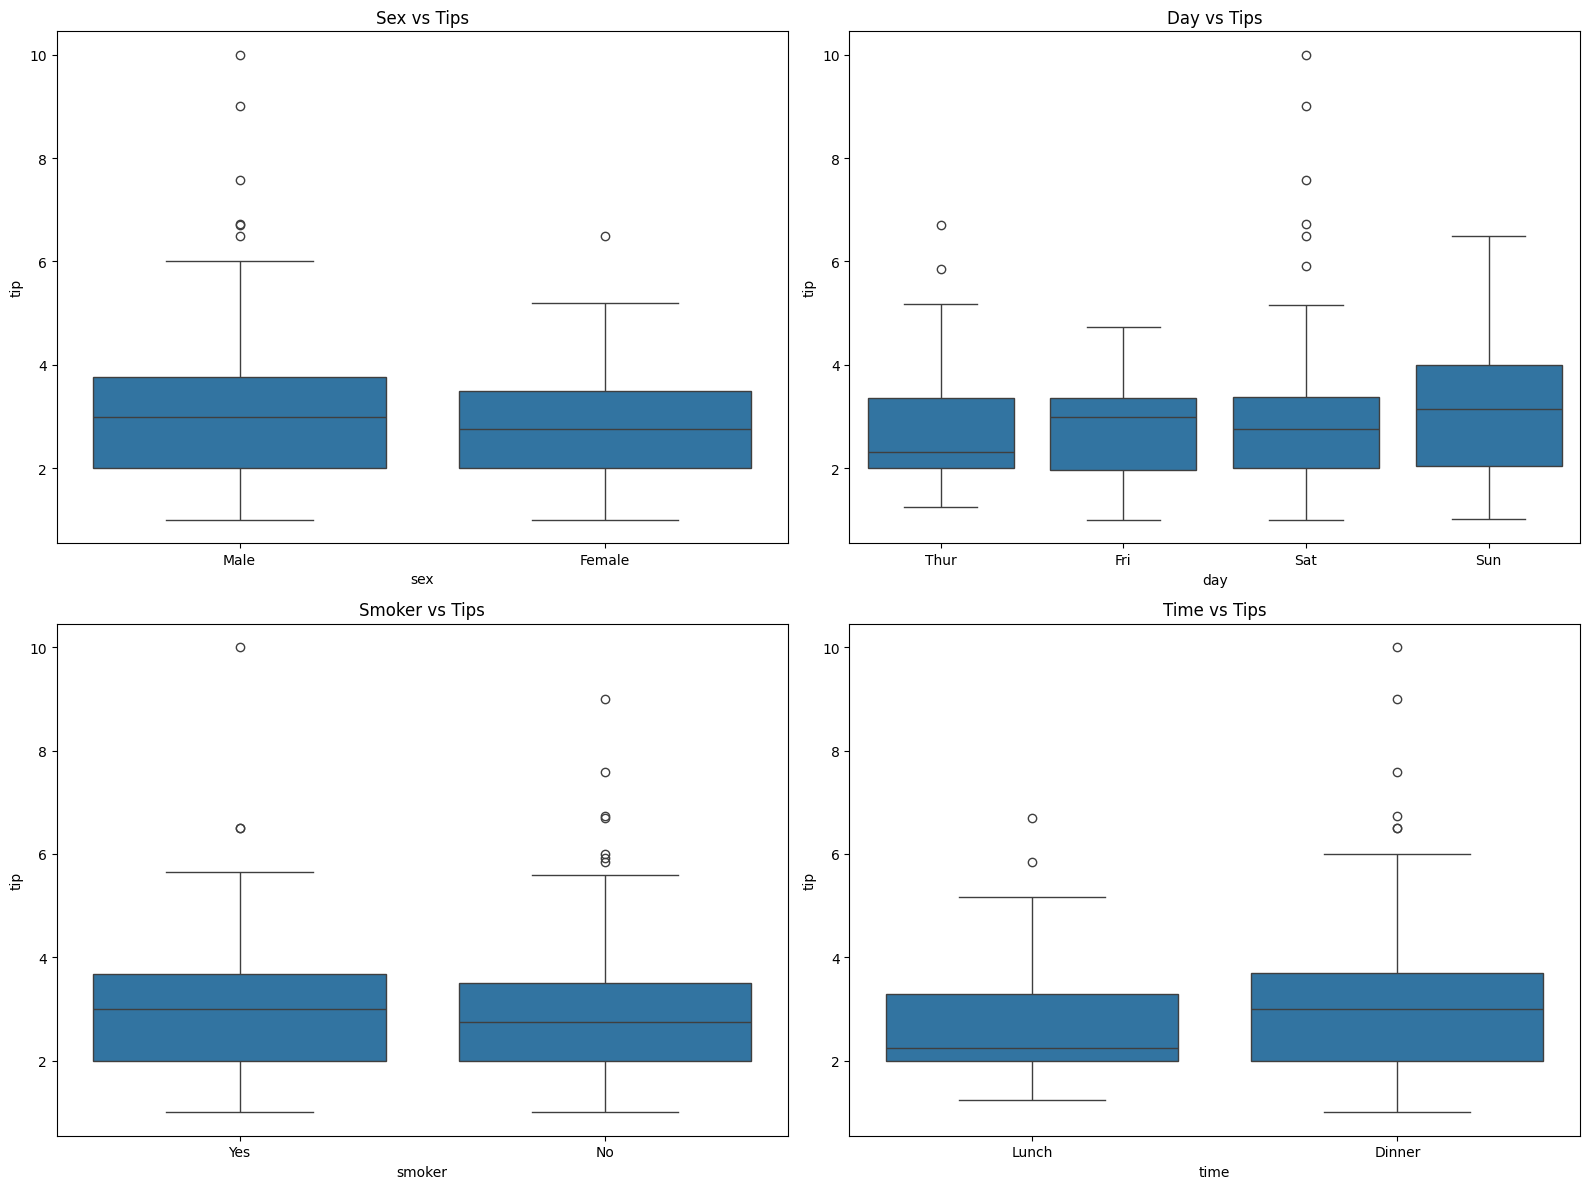

In [9]:
# Set the figure size for better readability
plt.figure(figsize=(16, 12))

# Sex vs Tips
plt.subplot(2, 2, 1)
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Sex vs Tips')

# Day vs Tips
plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='tip', data=df)
plt.title('Day vs Tips')

# Smoker vs Tips
plt.subplot(2, 2, 3)
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Smoker vs Tips')

# Time vs Tips
plt.subplot(2, 2, 4)
sns.boxplot(x='time', y='tip', data=df)
plt.title('Time vs Tips')

# Adjust layout
plt.tight_layout()
plt.show()


# Seperate into independent and dependent features

In [10]:
X = df.drop('tip', axis=1)
y = df['tip']

In [11]:
X[:5]

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [12]:
y[:5]

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

# Split the data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1011)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((183, 6), (61, 6), (183,), (61,))

# Do the feature encoding

## use label encoding for sex, smoker and time columns

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

#### Fit transform the X_train data

In [18]:
X_train['sex'] = le1.fit_transform(X_train['sex'])
X_train['smoker'] = le2.fit_transform(X_train['smoker'])
X_train['time'] = le3.fit_transform(X_train['time'])

#### Transform the X_test data.. we only do the transform not the fit becasue we want to prevent data leakage

In [19]:
X_test['sex'] = le1.transform(X_test['sex'])
X_test['smoker'] = le2.transform(X_test['smoker'])
X_test['time'] = le3.transform(X_test['time'])

In [20]:
X_train[:5]

,total_bill,sex,smoker,day,time,size
176,17.89,1,1,Sun,0,2
195,7.56,1,0,Thur,1,2
229,22.12,0,1,Sat,0,2
150,14.07,1,0,Sun,0,2
220,12.16,1,1,Fri,1,2


In [21]:
X_test[:5]

,total_bill,sex,smoker,day,time,size
224,13.42,1,1,Fri,1,2
121,13.42,0,0,Thur,1,2
65,20.08,1,0,Sat,0,3
159,16.49,1,0,Sun,0,4
162,16.21,0,0,Sun,0,3


## Onehot encoding for the Day column

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
ct = ColumnTransformer(transformers=[('onehot', OneHotEncoder(drop='first'), [3])], remainder='passthrough')

In [24]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [25]:
X_train[:5]

array([[ 0.  ,  1.  ,  0.  , 17.89,  1.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  ,  7.56,  1.  ,  0.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  , 22.12,  0.  ,  1.  ,  0.  ,  2.  ],
       [ 0.  ,  1.  ,  0.  , 14.07,  1.  ,  0.  ,  0.  ,  2.  ],
       [ 0.  ,  0.  ,  0.  , 12.16,  1.  ,  1.  ,  1.  ,  2.  ]])

In [26]:
X_test[:5]

array([[ 0.  ,  0.  ,  0.  , 13.42,  1.  ,  1.  ,  1.  ,  2.  ],
       [ 0.  ,  0.  ,  1.  , 13.42,  0.  ,  0.  ,  1.  ,  2.  ],
       [ 1.  ,  0.  ,  0.  , 20.08,  1.  ,  0.  ,  0.  ,  3.  ],
       [ 0.  ,  1.  ,  0.  , 16.49,  1.  ,  0.  ,  0.  ,  4.  ],
       [ 0.  ,  1.  ,  0.  , 16.21,  0.  ,  0.  ,  0.  ,  3.  ]])

# Create the model

In [27]:
from sklearn.svm import SVR

In [28]:
svr = SVR()

In [29]:
svr.fit(X_train, y_train)

SVR()

In [30]:
y_pred = svr.predict(X_test)

# Check the performance

In [31]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.4698222221803102
0.7034362414925052


# Hyperparameter Tuning using GridSearch CV


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
 # defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [34]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.024 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.040 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.047 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.016 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.129 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.110 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.163 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.183 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.186 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.191 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.171 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.450 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-1.058 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.854 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.405 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.031 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.037 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.781 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.351 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.108 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.01, kernel=rbf;, score=-0.453 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.171 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [35]:
grid.best_params_


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [36]:
grid_prediction=grid.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test,grid_prediction))
print(mean_absolute_error(y_test,grid_prediction))

0.44808080518515614
0.7162826277498587
